In [1]:
### ML_Micro_Credit_Loan.ipynb

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
data = pd.read_csv('/content/drive/My Drive/NLP/micro_credit_data.csv')

In [3]:
data = data.drop(['Unnamed: 0','msisdn','pcircle','pdate'],axis=1)
data.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333


In [4]:
print(data.shape)
data.info()

(209593, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  

In [5]:
data.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
label,1.000000,-0.003785,0.168298,0.166150,0.058085,0.075521,0.003728,0.001711,0.131804,0.237331,0.001330,0.202828,0.141490,-0.004829,0.236392,0.084385,0.205793,0.120855,0.039300,0.003827,-0.000027,0.002999,-0.005418,0.196283,0.197272,0.000248,0.044589,0.004733,0.199788,0.084144,0.035747,0.048336,0.049183
aon,-0.003785,1.000000,0.001104,0.000374,-0.000960,-0.000790,0.001692,-0.001693,0.004256,-0.003148,-0.001163,0.000707,0.004306,0.003930,-0.002725,0.004401,0.001011,0.004909,-0.000859,0.001564,0.000892,0.001121,0.005395,-0.001826,-0.001726,-0.002764,0.004664,-0.000611,-0.002319,-0.001191,0.002771,0.001940,0.002203
daily_decr30,0.168298,0.001104,1.000000,0.977704,0.442066,0.458977,0.000487,-0.001636,0.275837,0.451385,-0.000577,0.636536,0.295356,-0.001153,0.587338,-0.078299,0.762981,0.257847,0.037495,0.000700,-0.001499,0.038814,0.020673,0.366116,0.471492,-0.000028,-0.011610,0.008962,0.563496,0.400199,-0.037305,0.026915,0.047175
daily_decr90,0.166150,0.000374,0.977704,1.000000,0.434685,0.471730,0.000908,-0.001886,0.264131,0.426707,-0.000343,0.603886,0.282960,-0.000746,0.593069,-0.079530,0.768817,0.250518,0.036382,0.000661,-0.001570,0.031155,0.016437,0.340387,0.447869,0.000025,-0.005591,0.009446,0.567204,0.397251,-0.034686,0.019400,0.040800
rental30,0.058085,-0.000960,0.442066,0.434685,1.000000,0.955237,-0.001095,0.003261,0.127271,0.233343,-0.001219,0.272649,0.129853,-0.001415,0.312118,-0.033530,0.342306,0.110356,0.027170,-0.001105,-0.002558,0.072255,0.046761,0.180203,0.233453,-0.000864,-0.016482,0.004012,0.298943,0.234211,-0.035489,0.072974,0.095147
rental90,0.075521,-0.000790,0.458977,0.471730,0.955237,1.000000,-0.001688,0.002794,0.121416,0.230260,-0.000503,0.259709,0.120242,-0.001237,0.345293,-0.036524,0.360601,0.103151,0.029547,-0.000548,-0.002345,0.056282,0.036886,0.171595,0.231906,-0.001411,-0.009467,0.005141,0.327436,0.251029,-0.034122,0.067110,0.099501
last_rech_date_ma,0.003728,0.001692,0.000487,0.000908,-0.001095,-0.001688,1.000000,0.001790,-0.000147,0.004311,-0.001629,0.002105,-0.001358,0.004071,0.004263,0.001414,0.002243,-0.000726,-0.001086,-0.003467,-0.003626,-0.003538,-0.002395,0.001193,0.000903,0.000928,0.001835,-0.000225,0.000870,-0.001123,0.002771,-0.002233,-0.001583
last_rech_date_da,0.001711,-0.001693,-0.001636,-0.001886,0.003261,0.002794,0.001790,1.000000,-0.000149,0.001549,0.001158,0.000046,0.001037,0.002849,0.001272,0.000798,-0.000414,0.000219,0.004158,-0.003628,-0.000074,-0.001859,-0.000203,0.000380,0.000536,0.000503,0.000061,-0.000972,0.000519,0.001524,-0.002239,0.000077,0.000417
last_rech_amt_ma,0.131804,0.004256,0.275837,0.264131,0.127271,0.121416,-0.000147,-0.000149,1.000000,-0.002662,0.002876,0.440821,0.794646,-0.002342,0.016707,0.106267,0.418735,0.818734,0.124646,-0.001837,-0.003230,0.014779,0.016042,-0.027612,0.008502,0.001000,0.028370,0.000093,0.014067,0.148460,0.021004,-0.027369,-0.014260
cnt_ma_rech30,0.237331,-0.003148,0.451385,0.426707,0.233343,0.230260,0.004311,0.001549,-0.002662,1.000000,0.001669,0.656986,-0.011792,0.000082,0.886433,-0.152759,0.584060,-0.051347,0.013463,0.002306,-0.002732,0.011981,0.006989,0.765802,0.752296,0.000109,-0.067011,0.014703,0.685257,0.174104,-0.071451,0.043617,0.017362


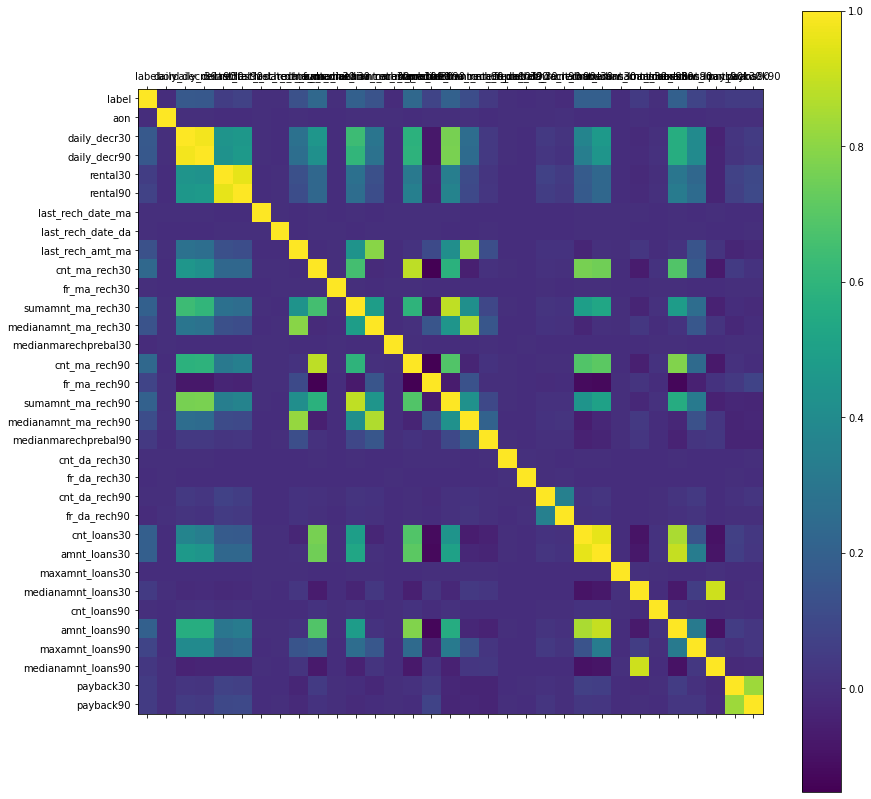

In [6]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(data.corr())
plt.yticks(np.arange(data.shape[1]), data.columns)
plt.xticks(np.arange(data.shape[1]), data.columns)
plt.colorbar()

In [7]:
data.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [8]:
def continous_data(i):
    if data[i].dtype!='object':
        plt.rcParams["figure.figsize"] = (5,5)
        print('--'*60)
        sns.boxplot(data[i])
        plt.title("Boxplot of "+str(i))
        plt.show()
        plt.title("histogram of "+str(i))        
        #data[i].plot.hist(bins = 20)
        sns.distplot(data[i],rug=True)
        plt.show()
        plt.clf()

In [9]:
# sns.set() #Sets the default seaborn style
# j=['label','aon', 'daily_decr30', 'daily_decr90', 'rental30',
#        'rental90', 'last_rech_date_ma', 'last_rech_date_da',
#        'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
#        'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
#        'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
#        'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
#        'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
#        'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
#        'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
#        'payback90']
# for k in j:
#     continous_data(i=k)

In [10]:
# Corr wrt Target Index
num_feat = data.select_dtypes(include=['float64','int64']) 
data_corr = num_feat.corr()['label'][1:]
data_corr
#print(type(data_corr))

aon                    -0.003785
daily_decr30            0.168298
daily_decr90            0.166150
rental30                0.058085
rental90                0.075521
last_rech_date_ma       0.003728
last_rech_date_da       0.001711
last_rech_amt_ma        0.131804
cnt_ma_rech30           0.237331
fr_ma_rech30            0.001330
sumamnt_ma_rech30       0.202828
medianamnt_ma_rech30    0.141490
medianmarechprebal30   -0.004829
cnt_ma_rech90           0.236392
fr_ma_rech90            0.084385
sumamnt_ma_rech90       0.205793
medianamnt_ma_rech90    0.120855
medianmarechprebal90    0.039300
cnt_da_rech30           0.003827
fr_da_rech30           -0.000027
cnt_da_rech90           0.002999
fr_da_rech90           -0.005418
cnt_loans30             0.196283
amnt_loans30            0.197272
maxamnt_loans30         0.000248
medianamnt_loans30      0.044589
cnt_loans90             0.004733
amnt_loans90            0.199788
maxamnt_loans90         0.084144
medianamnt_loans90      0.035747
payback30 

**Outliers Treatment**

In [11]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(data))
print(z)

[[2.64789583 0.10357685 0.25229941 ... 0.22959366 2.9046997  2.39409346]
 [0.37765836 0.09776412 0.73103667 ... 0.22959366 0.38562959 0.41923266]
 [0.37765836 0.10010243 0.43201111 ... 0.22959366 0.38562959 0.41923266]
 ...
 [0.37765836 0.09378769 0.70079045 ... 0.22959366 0.06820893 0.04735622]
 [0.37765836 0.08428915 0.77075515 ... 0.22959366 0.38562959 0.59938541]
 [0.37765836 0.08628398 0.09674426 ... 0.22959366 0.38562959 0.41923266]]


In [12]:
threshold = 3
print(np.where(z > 3))

(array([    21,     22,     22, ..., 209586, 209587, 209587]), array([15, 15, 32, ..., 28, 26, 30]))


In [13]:
print(z[21][15])

4.4703916213001245


In [14]:
data_o = data[(z < 3).all(axis=1)]

print(data.shape)
print(data_o.shape)

(209593, 33)
(161465, 33)


**Feature Selection**

In [15]:
# #get correlations of each features in dataset
# corrmat = data_o.corr()
# top_corr_features = corrmat.index
# top_corr_features
# plt.figure(figsize=(20,20))
# #plot heat map
# g=sns.heatmap(data_o[top_corr_features].corr(),annot=True,cmap="RdYlGn")

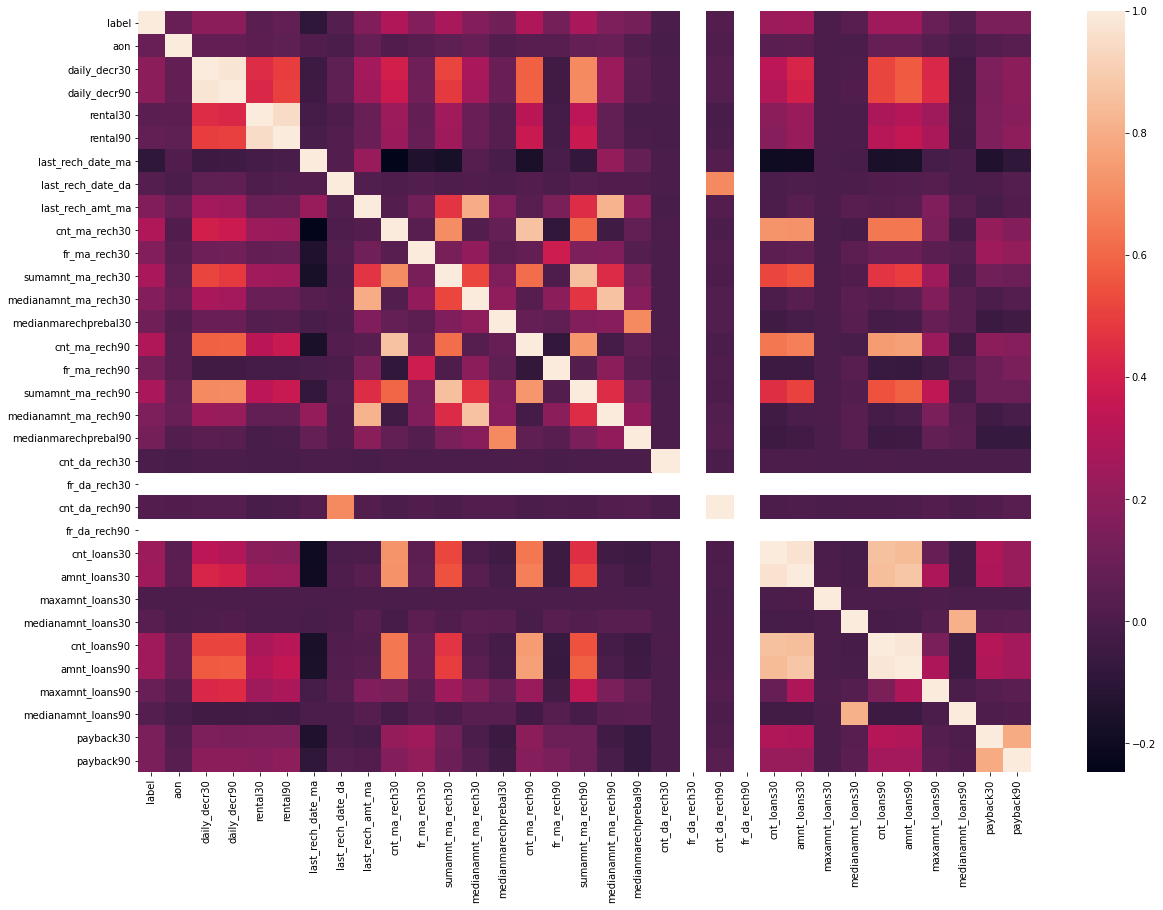

In [16]:
## Selecting features based on correlation
corr = data_o.corr()
sns.heatmap(corr)

In [17]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9:
            if columns[j]:
                columns[j] = False
selected_columns = data_o.columns[columns]
data_o_FSelected = data_o[selected_columns]

In [18]:
print(data_o.shape)
print(data_o_FSelected.shape)
data_o_FSelected.head()

(161465, 33)
(161465, 29)


,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,220.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,6.0,0.0,2.0,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12.0,0.0,1.0,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6.0,0.0,1.0,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,6.0,0.0,2.0,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,6.0,0.0,7.0,6,0.0,2.333333,2.333333


In [19]:
data_o_FSelected.columns

Index(['label', 'aon', 'daily_decr30', 'rental30', 'last_rech_date_ma',
       'last_rech_date_da', 'last_rech_amt_ma', 'cnt_ma_rech30',
       'fr_ma_rech30', 'sumamnt_ma_rech30', 'medianamnt_ma_rech30',
       'medianmarechprebal30', 'cnt_ma_rech90', 'fr_ma_rech90',
       'sumamnt_ma_rech90', 'medianamnt_ma_rech90', 'medianmarechprebal90',
       'cnt_da_rech30', 'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90',
       'cnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90'],
      dtype='object')

In [20]:
print((data_o_FSelected['fr_da_rech30']==0).all())
print((data_o_FSelected['fr_da_rech90']==0).all())

True
True


In [21]:
data_o_FSelected = data_o_FSelected.drop(['fr_da_rech30','fr_da_rech90'],axis=1)
data_o_FSelected.head()

,label,aon,daily_decr30,rental30,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,cnt_da_rech90,cnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
0,0,272.0,3055.050000,220.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0,2,6.0,0.0,2.0,6,0.0,29.000000,29.000000
1,1,712.0,12122.000000,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0,1,12.0,0.0,1.0,12,0.0,0.000000,0.000000
2,1,535.0,1398.000000,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0,1,6.0,0.0,1.0,6,0.0,0.000000,0.000000
3,1,241.0,21.228000,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0,2,6.0,0.0,2.0,6,0.0,0.000000,0.000000
4,1,947.0,150.619333,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0,7,6.0,0.0,7.0,6,0.0,2.333333,2.333333


**Handle Imbalanced dataset(Classes)**

In [55]:
data_o_FSelected_im = data_o_FSelected.copy()

In [56]:
data_o_FSelected_im['label'].value_counts()

1    139065
0     22400
Name: label, dtype: int64

In [57]:
# ### Using Up-Sampling Technique
# from sklearn.utils import resample

# # Separate majority and minority classes
# df_majority = data_o_FSelected_im[data_o_FSelected_im.label==1]
# df_minority = data_o_FSelected_im[data_o_FSelected_im.label==0]
 
# df_minority_upsampled = resample(df_minority, 
#                                  replace=True,     # sample with replacement
#                                  n_samples=139065,    # to match majority class
#                                  random_state=123) 
 
# # Combine majority class with upsampled minority class
# df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# df_upsampled.label.value_counts()



### Using Down-Sampling Technique
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = data_o_FSelected_im[data_o_FSelected_im.label==1]
df_minority = data_o_FSelected_im[data_o_FSelected_im.label==0]
 
df_majority_downsampled = resample(df_majority, 
                                 replace=False,     # sample with replacement
                                 n_samples=22400,    # to match majority class
                                 random_state=123) 
 
# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_majority_downsampled,df_minority])
df_downsampled.label.value_counts()

1    22400
0    22400
Name: label, dtype: int64

**Split Data in Features & Target**

In [58]:
dataset = df_downsampled.copy()
X_feature=dataset.drop(["label"],axis=1)
Y_target=dataset["label"]

In [59]:
print(X_feature.shape)
print(Y_target.shape)

print(type(X_feature))
#X_feature

(44800, 26)
(44800,)
<class 'pandas.core.frame.DataFrame'>


**Feature Scaling**

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_feature_scaled = sc.fit_transform(X_feature)
X_feature_scaled

array([[ 1.19177818, -0.4485858 ,  0.92363751, ..., -0.1423683 ,
        -0.48362684, -0.50985181],
       [ 1.47901696, -0.54918504, -0.58713995, ..., -0.1423683 ,
        -0.48362684, -0.50985181],
       [-0.29941892,  2.46942253,  1.30650102, ..., -0.1423683 ,
        -0.10466929, -0.19049293],
       ...,
       [ 0.28728157, -0.25092264, -0.4745187 , ..., -0.1423683 ,
        -0.48362684, -0.50985181],
       [ 0.4563654 , -0.16535891,  0.01120355, ..., -0.1423683 ,
        -0.48362684, -0.50985181],
       [ 0.69674963, -0.55212948, -0.65221098, ..., -0.1423683 ,
        -0.48362684, -0.50985181]])

**Split data in Training and Testing**

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_feature_scaled,Y_target,test_size=0.2,random_state=101)

**Modeling**

In [62]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
start_time_logreg = datetime.now()
logreg.fit(x_train, y_train)
end_time_logreg = datetime.now()
training_time_logreg = str(end_time_logreg-start_time_logreg)
acc_log = round(logreg.score(x_train, y_train) * 100, 2)
print("Training Accuracy:",acc_log)
acc_test_log = round(logreg.score(x_test, y_test) * 100, 2)
print("Testing Accuracy:",acc_test_log)
print("Training Time = "+ training_time_logreg)

Training Accuracy: 76.67
Testing Accuracy: 77.11
Training Time = 0:00:00.342367


**Confusion Matrix & Classification Report**

[[3617  853]
 [1198 3292]]


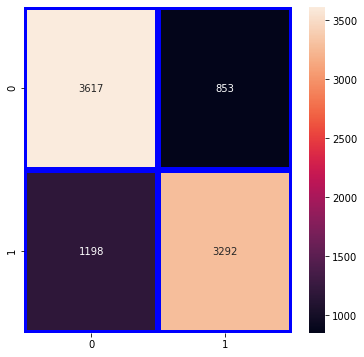

              precision    recall  f1-score   support

           0       0.75      0.81      0.78      4470
           1       0.79      0.73      0.76      4490

    accuracy                           0.77      8960
   macro avg       0.77      0.77      0.77      8960
weighted avg       0.77      0.77      0.77      8960



In [63]:
Ya = y_test  # Real Value
Yp = logreg.predict(x_test) 

from sklearn.metrics import confusion_matrix
cm_logreg = confusion_matrix(Ya,Yp)
print(cm_logreg)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_logreg,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

**ROC & AUC Curve**

[[0.06450126 0.93549874]
 [0.78632205 0.21367795]
 [0.79166542 0.20833458]
 ...
 [0.82129484 0.17870516]
 [0.0515672  0.9484328 ]
 [0.32142524 0.67857476]]
Length of X_test:  8960
length of Log_Model_prob:  8960
      Ya  Yp
0      1   1
1      0   0
2      1   0
3      0   0
4      0   1
...   ..  ..
8955   1   0
8956   1   0
8957   0   0
8958   1   1
8959   0   1

[8960 rows x 2 columns]
Prob. of 1 at given X:  [0.93549874 0.21367795 0.20833458 ... 0.17870516 0.9484328  0.67857476]
AUC is 0.84


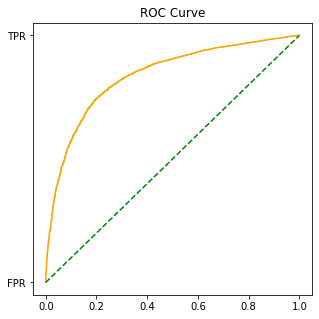

In [64]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Calculate of probabilitise at Given X (X_test)
logictic_model_probability = logreg.predict_proba(x_test)
print(logictic_model_probability)

print("Length of X_test: ",len(x_test))
print("length of Log_Model_prob: ",len(logictic_model_probability))


Ya_list = list(Ya)
Yp_list = list(Yp)
table  = pd.DataFrame({'Ya':Ya_list,'Yp':Yp_list})
print(table)

# Print the seperate probabilty of 1 & 0   
#prob_0 = logictic_model_probability[:,0]
prob_1 = logictic_model_probability[:,1]
#print("Prob. of 0 at given X: ",prob_0)
print("Prob. of 1 at given X: ",prob_1)


# Print AUC 
auc  = roc_auc_score(y_test,prob_1)
print("AUC is %.2f" %auc)


def plot_roc_binary_classi(fpr,tpr):                   # always fpr:X-axis & TPR: Y-axis
  plt.rcParams["figure.figsize"] = (5,5)
  plt.plot(fpr,tpr,color="orange",label="ROC")
  plt.plot([0,1],[0,1],color="green",linestyle="--")   # Draw a Random classification line (Normal Disgonal straight line [(0,0) to (1,1)] )
  plt.plot("FPR")
  plt.plot("TPR")
  plt.title("ROC Curve")
  #plt.legend()
  plt.show()

# Calculate TPR & FPR and Threshold values 
fpr,tpr,threshold = roc_curve(y_test,prob_1)
#print("FPR {}, TPR {} , threshold {}".format(fpr,tpr,threshold))
#threshold
plot_roc_binary_classi(fpr,tpr)

In [65]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import  GridSearchCV
random_forest = GridSearchCV(estimator=RandomForestClassifier(random_state=0, ccp_alpha=0.012), param_grid={'n_estimators': [100, 300]}, cv=10).fit(x_train, y_train)
start_time_random_forest = datetime.now()
random_forest.fit(x_train, y_train)
end_time_random_forest = datetime.now()
training_time_random_forest = str(end_time_random_forest-start_time_random_forest)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)
print("Training Accuracy:",acc_random_forest,random_forest.best_params_)
acc_test_random_forest = round(random_forest.score(x_test, y_test) * 100, 2)
print("Testing Accuracy:",acc_test_random_forest)
print("Training Time = "+ training_time_random_forest)

Training Accuracy: 75.4 {'n_estimators': 300}
Testing Accuracy: 75.49
Training Time = 0:09:33.356166


[[3410 1060]
 [1136 3354]]


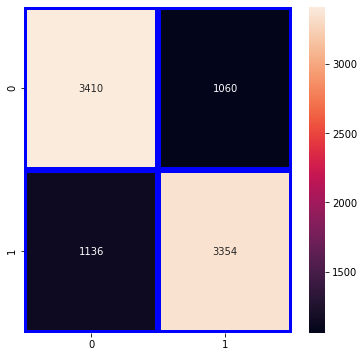

              precision    recall  f1-score   support

           0       0.75      0.76      0.76      4470
           1       0.76      0.75      0.75      4490

    accuracy                           0.75      8960
   macro avg       0.75      0.75      0.75      8960
weighted avg       0.75      0.75      0.75      8960



In [67]:
Ya = y_test  # Real Value
Yp = random_forest.predict(x_test) 

from sklearn.metrics import confusion_matrix
cm_random_forest = confusion_matrix(Ya,Yp)
print(cm_random_forest)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_random_forest,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

[[0.20866649 0.79133351]
 [0.82362734 0.17637266]
 [0.7253609  0.2746391 ]
 ...
 [0.82362734 0.17637266]
 [0.20866649 0.79133351]
 [0.32139012 0.67860988]]
Length of X_test:  8960
length of Log_Model_prob:  8960
      Ya  Yp
0      1   1
1      0   0
2      1   0
3      0   0
4      0   1
...   ..  ..
8955   1   1
8956   1   0
8957   0   0
8958   1   1
8959   0   1

[8960 rows x 2 columns]
Prob. of 1 at given X:  [0.79133351 0.17637266 0.2746391  ... 0.17637266 0.79133351 0.67860988]
AUC is 0.83


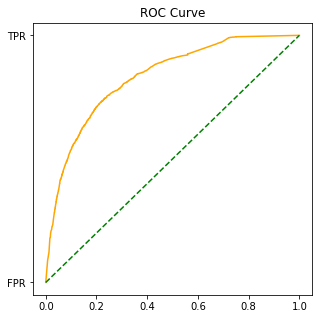

In [68]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Calculate of probabilitise at Given X (X_test)
logictic_model_probability = random_forest.predict_proba(x_test)
print(logictic_model_probability)

print("Length of X_test: ",len(x_test))
print("length of Log_Model_prob: ",len(logictic_model_probability))


Ya_list = list(Ya)
Yp_list = list(Yp)
table  = pd.DataFrame({'Ya':Ya_list,'Yp':Yp_list})
print(table)

# Print the seperate probabilty of 1 & 0   
#prob_0 = logictic_model_probability[:,0]
prob_1 = logictic_model_probability[:,1]
#print("Prob. of 0 at given X: ",prob_0)
print("Prob. of 1 at given X: ",prob_1)


# Print AUC 
auc  = roc_auc_score(y_test,prob_1)
print("AUC is %.2f" %auc)


def plot_roc_binary_classi(fpr,tpr):                   # always fpr:X-axis & TPR: Y-axis
  plt.rcParams["figure.figsize"] = (5,5)
  plt.plot(fpr,tpr,color="orange",label="ROC")
  plt.plot([0,1],[0,1],color="green",linestyle="--")   # Draw a Random classification line (Normal Disgonal straight line [(0,0) to (1,1)] )
  plt.plot("FPR")
  plt.plot("TPR")
  plt.title("ROC Curve")
  #plt.legend()
  plt.show()

# Calculate TPR & FPR and Threshold values 
fpr,tpr,threshold = roc_curve(y_test,prob_1)
#print("FPR {}, TPR {} , threshold {}".format(fpr,tpr,threshold))
#threshold
plot_roc_binary_classi(fpr,tpr)

In [69]:
# Support Vector Machines
from sklearn.svm import SVC, LinearSVC
svc = SVC(probability=True)
start_time_svc = datetime.now()
svc.fit(x_train, y_train)
end_time_svc = datetime.now()
training_time_svc = str(end_time_svc-start_time_svc)
acc_svc = round(svc.score(x_train, y_train) * 100, 2)
print("Training Accuracy:",acc_svc)
acc_test_svc = round(svc.score(x_test, y_test) * 100, 2)
print("Testing Accuracy:",acc_test_svc)
print("Training Time = "+ training_time_svc)

Training Accuracy: 79.12
Testing Accuracy: 78.23
Training Time = 0:09:03.374224


[[3639  831]
 [1120 3370]]


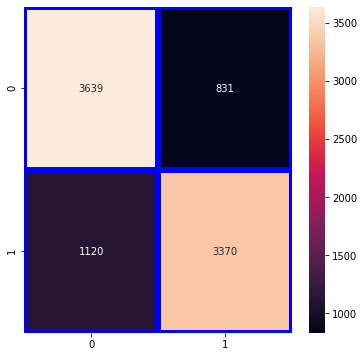

              precision    recall  f1-score   support

           0       0.76      0.81      0.79      4470
           1       0.80      0.75      0.78      4490

    accuracy                           0.78      8960
   macro avg       0.78      0.78      0.78      8960
weighted avg       0.78      0.78      0.78      8960



In [70]:

Ya = y_test  # Real Value
Yp = svc.predict(x_test) 

from sklearn.metrics import confusion_matrix
cm_svc = confusion_matrix(Ya,Yp)
print(cm_svc)

# For more clearence of classification show Heatmap
import seaborn as sb
f,ax = plt.subplots(figsize=(6,6))
sb.heatmap(cm_svc,annot=True,linewidths=5,linecolor='blue',fmt=".00f",ax=ax)     # fmt=".00f" -> Two decimal points with float
plt.show()

from sklearn.metrics import classification_report
class_report = classification_report(Ya,Yp)
print(class_report)

[[0.13139019 0.86860981]
 [0.80699007 0.19300993]
 [0.8199654  0.1800346 ]
 ...
 [0.80705655 0.19294345]
 [0.13220229 0.86779771]
 [0.26793485 0.73206515]]
Length of X_test:  8960
length of Log_Model_prob:  8960
      Ya  Yp
0      1   1
1      0   0
2      1   0
3      0   0
4      0   1
...   ..  ..
8955   1   1
8956   1   1
8957   0   0
8958   1   1
8959   0   1

[8960 rows x 2 columns]
Prob. of 1 at given X:  [0.86860981 0.19300993 0.1800346  ... 0.19294345 0.86779771 0.73206515]
AUC is 0.84


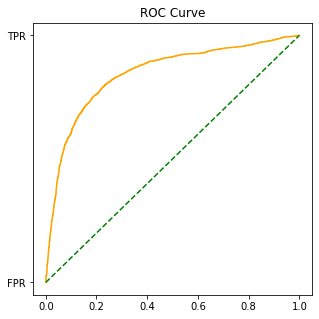

In [71]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# Calculate of probabilitise at Given X (X_test)
logictic_model_probability = svc.predict_proba(x_test)
print(logictic_model_probability)

print("Length of X_test: ",len(x_test))
print("length of Log_Model_prob: ",len(logictic_model_probability))


Ya_list = list(Ya)
Yp_list = list(Yp)
table  = pd.DataFrame({'Ya':Ya_list,'Yp':Yp_list})
print(table)

# Print the seperate probabilty of 1 & 0   
#prob_0 = logictic_model_probability[:,0]
prob_1 = logictic_model_probability[:,1]
#print("Prob. of 0 at given X: ",prob_0)
print("Prob. of 1 at given X: ",prob_1)


# Print AUC 
auc  = roc_auc_score(y_test,prob_1)
print("AUC is %.2f" %auc)


def plot_roc_binary_classi(fpr,tpr):                   # always fpr:X-axis & TPR: Y-axis
  plt.rcParams["figure.figsize"] = (5,5)
  plt.plot(fpr,tpr,color="orange",label="ROC")
  plt.plot([0,1],[0,1],color="green",linestyle="--")   # Draw a Random classification line (Normal Disgonal straight line [(0,0) to (1,1)] )
  plt.plot("FPR")
  plt.plot("TPR")
  plt.title("ROC Curve")
  #plt.legend()
  plt.show()

# Calculate TPR & FPR and Threshold values 
fpr,tpr,threshold = roc_curve(y_test,prob_1)
#print("FPR {}, TPR {} , threshold {}".format(fpr,tpr,threshold))
#threshold
plot_roc_binary_classi(fpr,tpr)